In [2]:
#import stuff
import pandas as pd
import matplotlib

In [3]:
#connect to the .txt file remotely as hosted on github (use raw version)
url = 'https://raw.githubusercontent.com/KimVilimas/ignData/main/ign.csv'
df = pd.read_csv(url, index_col=0)

In [4]:
#Can use the .head() to say you want to show first few records (default 5)
df.head(6)      #.tail() is the converse to this for last records

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


In [19]:
#If you wanted the total records and columns/headers/fieldnames, use df.shape
df.shape

(18625, 10)

In [9]:
#Here is something called .iloc where you can basically control+f any row/column you want to see, calling it 'indexing by position'
df.iloc[0:5,0:3]  
#the first is rows [0:5] says start at 0 and go to 5 (but not including 5)
#the second is columns and _:_ defaults to all of them, or specify

,score_phrase,title,url
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...
2,Great,Splice: Tree of Life,/games/splice/ipad-141070
3,Great,NHL 13,/games/nhl-13/xbox-360-128182
4,Great,NHL 13,/games/nhl-13/ps3-128181


In [20]:
#with .iloc you can just single one row/column out
df.iloc[9,:]


score_phrase                                           Good
title                             Total War Battles: Shogun
url               /games/total-war-battles-shogun/pc-142564
platform                                                 PC
score                                                     7
genre                                              Strategy
editors_choice                                            N
release_year                                           2012
release_month                                             9
release_day                                              11
Name: 9, dtype: object

In [11]:
df = df.iloc[:,1:]  #df = itself with a change
#want to get rid of that one extra index column that is weirdly there
# _:_rows, so keep all rows, _:_columns, so start at 1 instead of 0, or chop off 0
df.head()

,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [21]:
#So there's 'iloc' (above,locate by row/col) and just 'loc' (locate by label)
df.loc[:5,"score"] #so 0 to 5 rows, and from the score column
df.loc[:5,["score", "release_year"]]    #can do mult columns, need inner[]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


In [41]:
#Review, all the ways to just bring up one column
df.iloc[:,1]
df.loc[:,'score_phrase']
df['score']
df[['score', 'release_year']]   #This just braket thing works with list of cols

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
...,...,...
18620,7.6,2016
18621,9.0,2016
18622,5.8,2016
18623,10.0,2016


In [22]:
#Letting me know that Dataframe is multiple rows/cols, Series is just one row/col
#can check/verify with this 'type' thing
type(df["score"])

pandas.core.series.Series

In [23]:
#Play around more with Series, I hope this is going somewhere
s1 = pd.Series([1,2])  
s1

0    1
1    2
dtype: int64

In [24]:
#Can be mixed types with Series, like a string
s2 = pd.Series(['Boris Yeltsin', 'Mikhail Gorbachev'])
s2

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object

In [25]:
#You can create a New dataframe and pass it the single series/columns you made
pd.DataFrame([s1,s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


In [16]:
#Can pass it double [][], or list of lists, and instead of s1,s2 can write it out
pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ]
)

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


In [26]:
#You can add the columns at the end to specify/name those
pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    columns=["column1", "column2"]
)
#Note: I really hate that in the same column there is a 1 and then a string >:(

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


In [39]:
#Can also specify row names (the index) and also name this all frame
frame = pd.DataFrame(
    [
    [1,2],
    ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)
frame

#this is the same shit but without indenting/all as one line
frame = pd.DataFrame([[1,2],["Boris Yeltsin", "Mikhail Gorbachev"]],index=["row1", "row2"],columns=["column1", "column2"])
frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


In [40]:
#Now that we have a mini-dataframe we can use the loc and stuff from before
frame.loc["row1":"row2", "column1"]

row1                1
row2    Boris Yeltsin
Name: column1, dtype: object

In [31]:
#So far, we've done locating/finding withing the data with loc and iloc, you know, 'show me what i want to see right now in the data', but not patterns from it
#This is where he loses me, each column in a DataFrame is a Series Object
type(df["title"])

pandas.core.series.Series

In [32]:
df["title"].head()  #I think we looking at just one column only

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object

In [33]:
#We can do calculations for just that one column/series
df["score"].min()  #median,std, max, min, count(all non nulls) all work too

0.5

In [34]:
#If you wanted not just one column but default to all columns, use big boi
df.mean()   #the whole dataframe/df

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [24]:
#Along with the min, max, there is also Corrolate, .corr
#See if any columns are corrolated
df.corr()
#i don't understand how to read this output yet

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


In [35]:
#Finally, filtering the data
score_filter = df["score"] > 7  #find all the ones with a score of 7 or higher
score_filter                    #it makes a boolean series

0         True
1         True
2         True
3         True
4         True
         ...  
18620     True
18621     True
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

In [26]:
filtered_reviews = df[score_filter]   #pass it that list of booleans
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [36]:
#Multiple filter criteria at once
#Check if score is above 7 and also if platform = xbox1
xbox_one_filter = (df["score"] > 7) & (df["platform"] == "Xbox One")    #use (), &
filtered_reviews = df[xbox_one_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


&lt;AxesSubplot:ylabel=&#39;Frequency&#39;&gt;

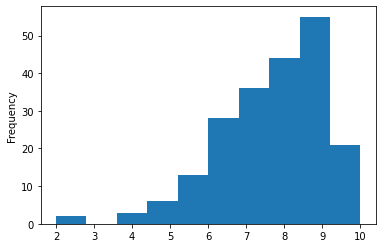

In [28]:
#Now for actual graphing finally!! 
#Will use 'pd.DataFrame.plot' method
#Will use matplotlib now so went back and added that to imports (neccesary?idk)

df[df["platform"] == "Xbox One"]["score"].plot(kind="hist") 
#even though this looks weird, it is basically dataframe.plot, with specifications

<AxesSubplot:ylabel='Frequency'>

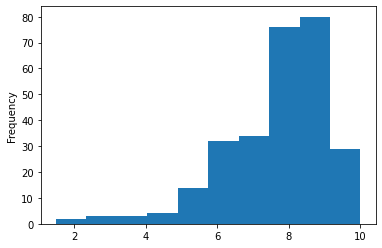

In [38]:
#Now for the PS4 instead of Xbox
df[df["platform"] == "PlayStation 4"]["score"].plot(kind="hist")

In [ ]:
#These graphs are not easy to read/decipher. 
#The Axes are not labeled very well